<h1> <b> Purpose of this analysis</b></h1>
Purpose of this mini project is to perform stastical analysis on Lending Club loan data.

<h1> <b> Packages</b></h1>
We will start by importing some of packages. Following packages will be imported.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

sns.set_style('whitegrid')

Now we will be reading data from "Loan.csv" to Pandas Dataframe.

In [4]:
file1 = "Loan_cleandata2.csv"
file2 = 'train_data.csv'
ChunkSize = 100000
i = 1
for chunk in pd.read_csv(file1, chunksize=ChunkSize):
    loan_data = chunk if i == 1 else pd.concat([loan_data, chunk])
    print('-->Read Chunk...', i)
    i += 1

# data_list = []
# for chunk in pd.read_csv(file2, low_memory=False, chunksize=100000):
#     data_list.append(chunk)
# train_data = pd.concat(data_list)
# del data_list

# create train and test dataset. All laons that are current will be test dataset.

loan_data.drop(loan_data.columns[0], axis=1, inplace = True)

-->Read Chunk... 1
-->Read Chunk... 2
-->Read Chunk... 3
-->Read Chunk... 4
-->Read Chunk... 5
-->Read Chunk... 6
-->Read Chunk... 7
-->Read Chunk... 8
-->Read Chunk... 9
-->Read Chunk... 10
-->Read Chunk... 11
-->Read Chunk... 12
-->Read Chunk... 13
-->Read Chunk... 14
-->Read Chunk... 15
-->Read Chunk... 16
-->Read Chunk... 17
-->Read Chunk... 18
-->Read Chunk... 19


Let's quickly check the shape of data.This will give us idea as how large is current dataset. As we can see, current data set contains more than 2 million rows and 145 columns. Not all columns are useful for our analysis. 

In [5]:
# print(list(data.columns))
loan_data['term'] = loan_data['term'].str.strip()
print(loan_data.head())

        term  int_rate  installment grade sub_grade       emp_title  \
0  36 months     13.56        84.92     C        C1            Chef   
1  60 months     18.94       777.23     D        D2     Postmaster    
2  36 months     17.97       180.69     D        D1  Administrative   
3  36 months     18.94       146.51     D        D2   IT Supervisor   
4  60 months     16.14       731.78     C        C4        Mechanic   

   emp_length home_ownership  annual_inc verification_status loan_status  \
0          10           RENT     55000.0        Not Verified     Unknown   
1          10       MORTGAGE     90000.0     Source Verified     Unknown   
2           6       MORTGAGE     59280.0     Source Verified     Unknown   
3          10       MORTGAGE     92000.0     Source Verified     Unknown   
4          10       MORTGAGE     57250.0        Not Verified     Unknown   

              purpose addr_state    dti  delinq_2yrs initial_list_status  \
0  debt_consolidation         NY  18.24 

In [6]:

# train_data.drop(train_data.columns[0], axis=1, inplace = True)
# print(loan_data.columns)

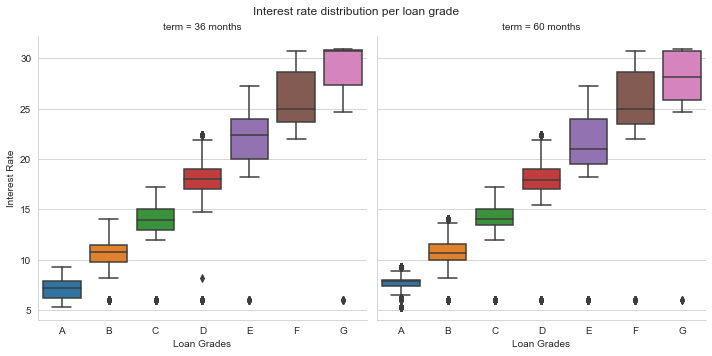

In [7]:
g =sns.catplot(x='grade', y = 'int_rate', data = loan_data, kind='box', order = sorted(loan_data['grade'].unique()),\
               col='term')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Interest rate distribution per loan grade', fontsize=12)
axes = g.axes.flatten()
axes[0].set_ylabel("Interest Rate")
for ax in axes:
    ax.set_xlabel("Loan Grades")
plt.subplots_adjust(hspace = 1.0,top = 0.9)              

### Statistical Analysis 1: 
Here we are going to check weather loan grade has effect on interest rate. it is obvious from Visulization graph however, we will analyze this using Statistical Analysis. 

**Null Hypotheses or $H_0$ :** Interest rate is evenly distributed among loan grade. Which means means interest rate for all loan grade is same. 

**Alternative Hypotheses or $H_a$ :** Interest rate is not evenly distributed among loan grade. Mean of interest rate for each loan grade is different.



In [8]:
# Developing bootstrapping



In [24]:
#Generating numpy arrays

grades = sorted(list(loan_data['grade'].unique()))
print(grades)
loan_grade_arrays = [np.random.choice(loan_data[loan_data['grade'] == g ]['int_rate'].to_numpy(), size=500) for g in grades]
# print(len(loan_grade_arrays))
# print(loan_grade_arrays[0][:5])
mean_overall_interest_rate = loan_data['int_rate'].mean()
for i, g in enumerate(loan_grade_arrays):
    print("Mean of Loan Grade %s is : %.2f" %(grades[i], np.mean(g)) )

annova = stats.f_oneway(loan_grade_arrays[0], loan_grade_arrays[1], loan_grade_arrays[2], loan_grade_arrays[3],\
              loan_grade_arrays[4], loan_grade_arrays[5], loan_grade_arrays[6])
print(annova)

['A', 'B', 'C', 'D', 'E', 'F', 'G']
7
Mean of Loan Grade A is : 7.03
Mean of Loan Grade B is : 10.73
Mean of Loan Grade C is : 14.14
Mean of Loan Grade D is : 18.21
Mean of Loan Grade E is : 21.81
Mean of Loan Grade F is : 25.57
Mean of Loan Grade G is : 28.53
F_onewayResult(statistic=8222.327059948651, pvalue=0.0)


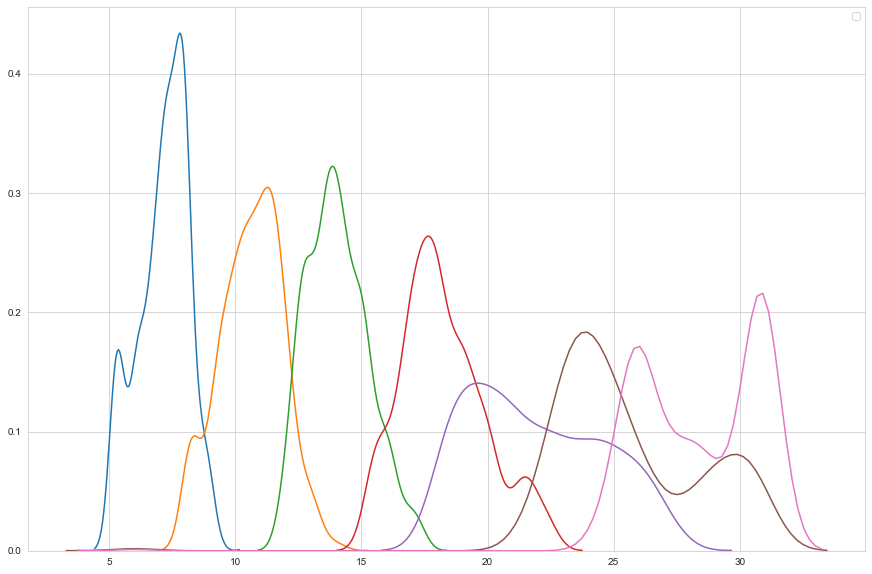

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
for g in loan_grade_arrays:
    sns.distplot(g, hist=False)
ax.legend(grades)

In [20]:
loan_data['year'] = pd.to_datetime(loan_data['issue_d']).dt.year
# print(train_data['loan_status'].value_counts())
# train_data['status_var'] = train_data['loan_status'].map({'Fully Paid':0, 'Charged Off':1, 'Late (31-120 days)':1, \
#                                                         'In Grace Period':1, 'Late (16-30 days)':1, 'Default':1})
# print(train_data['status_var'].value_counts())
loan_status_dict = {"Fully Paid": 0, "Charged Off": 1, "Late (31-120 days)": 1,
                    "In Grace Period": 1, "Late (16-30 days)": 1, "Default": 1, "Current" : 2}
known_status = loan_data['loan_status'] != 'Current'
loan_data["loan_status_count"] = loan_data["loan_status"].map(loan_status_dict)
loan_data["loan_status_count"] = loan_data["loan_status_count"].astype("int")

loan_known_data = loan_data[known_status].reset_index()
loan_status_count = loan_known_data["loan_status_count"].value_counts().to_dict()
if 1 not in loan_status_count.keys():
    loan_status_count["1"] = 0.0
count_sum = 0
for key, value in loan_status_count.items():
    count_sum += value
for key, value in loan_status_count.items():
    value = value / count_sum
    loan_status_count[key] = value
loan_status_count_pd = pd.DataFrame(list(loan_status_count.items()), columns=["loan status", "count_percent"])
# print(loan_known_data.head())

KeyError: 'issue_d'

Text(0, 0.5, 'Loans percent')

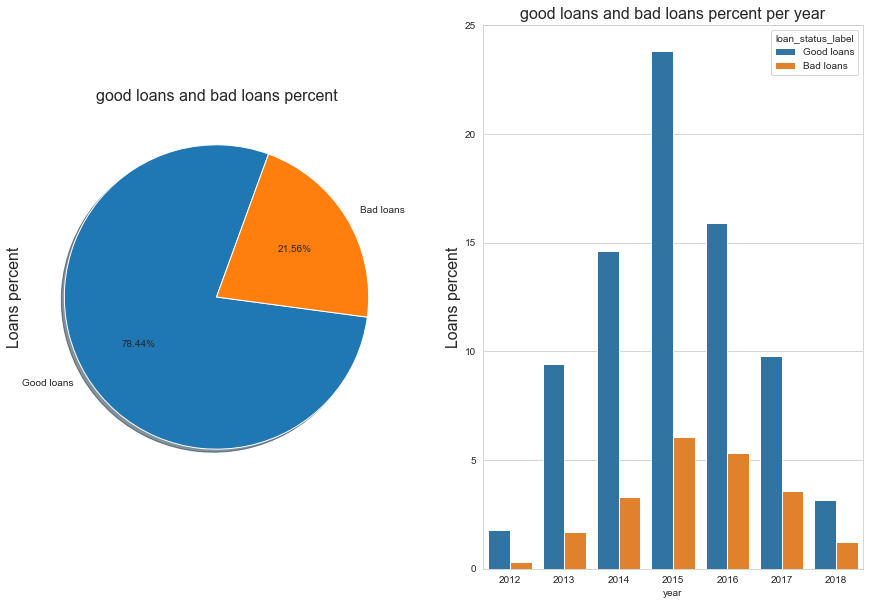

In [50]:
f_loan_status, ax_loan_status = plt.subplots(1, 2, figsize=(15, 10))
labels = "Good loans", "Bad loans"
ax_loan_status[0].pie(loan_status_count_pd["count_percent"], autopct="%1.2f%%", shadow=True,
                      labels=labels, startangle=70)
loan_status_dict = {0.0: "Good loans", 1.0: "Bad loans"}
loan_known_data["loan_status_label"] = loan_known_data["loan_status_count"].map(loan_status_dict)
sns.barplot(x=loan_known_data["year"], y=loan_known_data["loan_amnt"], hue=loan_known_data["loan_status_label"], hue_order=labels,
            ax=ax_loan_status[1], estimator=lambda x: len(x) / len(loan_known_data["loan_status_count"]) * 100)
ax_loan_status[0].set_title("good loans and bad loans percent", fontsize=16)
ax_loan_status[0].set_ylabel("Loans percent", fontsize=16)
ax_loan_status[1].set_title("good loans and bad loans percent per year", fontsize=16)
ax_loan_status[1].set_ylabel("Loans percent", fontsize=16)

### Statistical Analysis 2 - Difference of Proportion Two sample t-Test: 
Suppose we stats that there is equal amount of loan default rate between 36 months and 60 months loan terms. In other word, loan terms of 36 months or 60 months has no effect on loan default rate. 

To test this claim, we will choose random sample of 500 loan status from each 36 months and 60 months from a population of more than 2 millions.

At the end of the sample study, **19.2% loans in 36 months** results in default rate while **37.8% loans in 60 months** results in default rate. Based on these findings, can we reject the claim that the loan default rate is equal for 36 month and 60 months term? Use a **0.05 level of significance.**

**Solution:** The solution to this problem takes four steps:
1. state the hypotheses 
2. formulate an analysis plan
3. analyze sample data
4. interpret results. 

We work through those steps below:

* **State the hypotheses.** The first step is to state the null hypothesis and an alternative hypothesis.

> > **Null Hypotheses or $H_0$ : P1 = P2**

> > **Alternative Hypotheses or $H_a$ : P1 ≠ P2**

   Note that these hypotheses constitute a two-tailed test. The null hypothesis will be rejected if the proportion from population 1 is too big or if it is too small.

* **Formulate an analysis plan.** For this analysis, the significance level is 0.05. The test method is a two-proportion z-test.


* **Analyze sample data.** Using sample data, we calculate the pooled sample proportion (p) and the standard error (SE). Using those measures, we compute the z-score test statistic (z).

         p1 = 0.192
         p2 = 0.378
         n1 = 500
         n2 = 500
         p = (p1*n1 + p2*n2)/(n1+n2) = 0.285
         standard error or se = sqrt[p*(1-p)*(1/n1 + 1/n2)] = 0.0272
         z_score or z = (p1-p2) / se = -6.24
         
         From Normal Distribution CDF  p-val = 2.17*10^-10 ~= 0
    Since p-val is less than our significance level 0.05, we will reject our null hypotheses. Hence, there is significant effect of loan terms on loan default rate.
         

In [98]:
np.random.seed(47)
loan_status_36 = np.random.choice(loan_known_data[loan_known_data['term'] == '36 months']['loan_status_count'].to_numpy(),\
                                  size=500)

loan_status_60 = np.random.choice(loan_known_data[loan_known_data['term'] == '60 months']['loan_status_count'].to_numpy(),\
                                   size=500)

# Calcualting p1, p2 and p
p1 = np.mean(loan_status_36)
p2 = np.mean(loan_status_60)
n1 = 500
n2= 500
p = 0.5*(p1+p2)

se = np.sqrt(p*(1-p)* (1/n1 + 1/n2))
z = (p1-p2)/se

score = stats.norm.cdf(z)
print('population 1 proportion for 36 month loan term is ' ,p1)
print('population 2 proportion for 60 month loan term is ', p2)
print('combine proportion of both sample is %5.2f' %p)
print('Standard error for our samples is %5.2f' %se)
print('z score for selected sample is %5.5f' %z)
print('using normal distribution p-val for z score = %5.2f is %5.5f' %(z, score))

print('Since our calcualted p-val = %5.5f is less than significance level 0.05, we will reject the null hypothesis' %score)

population 1 proportion for 36 month loan term is  0.192
population 2 proportion for 60 month loan term is  0.378
combine proportion of both sample is  0.29
Standard error for our samples is  0.03
z score for selected sample is -6.51490
using normal distribution p-val for z score = -6.51 is 0.00000
Since our calcualted p-val = 0.00000 is less than significance level 0.05, we will reject the null hypothesis


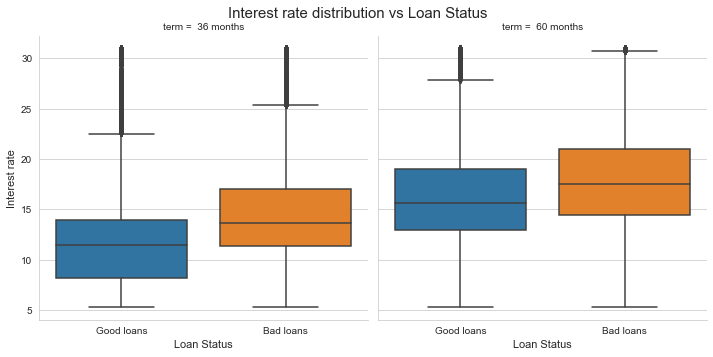

In [134]:
g = sns.catplot(x='loan_status_label', y = 'int_rate', data=loan_known_data, kind='box', col='term', order=labels)
plt.tight_layout()

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Interest rate distribution vs Loan Status', fontsize=15)
axes = g.axes.flatten()
axes[0].set_ylabel("Interest rate", fontsize=11)
for ax in axes:
    ax.set_xlabel("Loan Status", fontsize=11)

### Statistical Analysis 3: Difference of two means - two sample t-Test
**Problem :**

 Within our lending clum loan data set we have categorical variable 'loan_status_label' which is categorized into 'Good Loans' and 'Bad Loans'. Mean interest rate for 500 samples of 'Good Loans' is 12.68, where as for 500 samples of 'Bad Loans' is 15.48. Standard Deviation for 'Good Loans' is 4.68 where as for 'Bad Loans' is 4.72. Which is almost close and we will consider it two sample t-test assuming equal variance. We will test that higher mean interest rate for 'Bad Loans' is just by chance. Meaning typically difference of mean is 0.
 
We will use a 0.05 level of significance.

To test this claim, we will choose random sample of 500 loan status from each 'Good Loans' and 'Bad Loans' from a population of more than 2 millions.


**Solution:** The solution to this problem takes four steps:
1. state the hypotheses 
2. formulate an analysis plan
3. analyze sample data
4. interpret results. 

We work through those steps below:

* **State the hypotheses.** The first step is to state the null hypothesis and an alternative hypothesis.

> > **Null Hypotheses or $H_0$ : $\mu_1$ = $\mu_2$**

> > **Alternative Hypotheses or $H_a$ : $\mu_1$ $\neq$ $\mu_2$**

   Note that these hypotheses constitute a two-tailed test. The null hypothesis will be rejected if the proportion from population 1 is too big or if it is too small.

* **Formulate an analysis plan.** For this analysis, the significance level is 0.05. Using sample data, we will conduct a two-sample t-test of the null hypothesis.


* **Analyze sample data.** Using sample data, we compute the standard error (SE), degrees of freedom (DF), and the t statistic test statistic (t).

         $\mu_1$ = 12.68
         $\mu_2$ = 15.48
         s_1 = 4.68
         s_2 = 4.72
         n_1 = 500
         n_2 = 500         
         SE = sqrt[(s12/n1) + (s22/n2)]
         standard error or se = sqrt[(s1^2/n1 + s2^2/n2)]  = 0.298
         DF = [(s1^2/n1 + s2^2/n2)]^2  / ((s1^2/n1)^2 / (n1-1) + (s2^2/n2)^2 / (n2-1)) = 998
         t_score or t = ($\mu_1$ - $\mu_2$) / se = 9.40
         
         
         From Normal Distribution CDF  p-val = 0
    Since p-val is less than our significance level 0.05, we will reject our null hypotheses. Hence, Interest rates are not equally distributed among good loans and bad loans. 
         

In [132]:

np.random.seed(47)

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

good_loans = np.random.choice(loan_known_data[loan_known_data['loan_status_label'] == 'Good loans']['int_rate'].to_numpy()\
                              , size=500)
bad_loans = np.random.choice(loan_known_data[loan_known_data['loan_status_label'] == 'Bad loans']['int_rate'].to_numpy()\
                             , size=500)
mu_1 = np.mean(good_loans)
s1 = np.std(good_loans)
mu_2 = np.mean(bad_loans)
s2 = np.std(bad_loans)
empirical_diff_means = np.abs(mu_1 - mu_2)
# compute the mean of all loans
data = np.concatenate((good_loans, bad_loans))
mu = np.mean(data)
n1=len(good_loans)
n2=len(bad_loans)


# Method 1 : Using Bootstrap relicates with shifting the mean to combined mean
good_loan_shifted = good_loans - np.mean(good_loans) + mu
bad_loan_shifted = bad_loans - np.mean(bad_loans) + mu

bs_replicates_a = draw_bs_reps(good_loan_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(bad_loan_shifted, np.mean, size=10000)

bs_replicates = bs_replicates_a - bs_replicates_b
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)


# method2 : Statistical Calculation using FormulA
se = np.sqrt(s1**2/n1 + s2**2/n2)
df = (se**4) / (((s1**2/n1)**2)/(n1-1) + ((s2**2/n2)**2)/(n2-1))

t = empirical_diff_means/se
pval = stats.t.sf(np.abs(t), df)*2  # two-sided pvalue = Prob(abs(t)>tt)
print ('t-statistic = %6.3f pvalue = %6.4f' % (t, pval))
print(mu_1, mu_2, s1, s2, mu, se, df, t, p_val)

# Method 3: Using Scipy Function
print(stats.ttest_ind(good_loans, bad_loans, axis=0, equal_var=True, nan_policy='propagate'))


#######
# Method 4 : Using Permutation
reps = 1000
perm = np.array([np.random.permutation(len(good_loans) + len(bad_loans)) for i in range(reps)])
permuted_A_datasets = data[perm[:, :len(good_loans)]]
permuted_B_datasets = data[perm[:, len(bad_loans):]]

samples = np.mean(permuted_A_datasets, axis=1) - np.mean(permuted_B_datasets, axis=1)
test_stat = np.mean(good_loans) - np.mean(bad_loans)
print(test_stat)
p_val = 2*np.sum(samples >= np.abs(test_stat))/reps
print("p-value = {}".format(p_val))


p-value = 0.0
t-statistic =  9.399 pvalue = 0.0000
12.680080000000002 15.478639999999999 4.68806134703888 4.727898999598024 14.079360000000001 0.29776147549338877 997.9285500171884 9.398663797466753 0.0
Ttest_indResult(statistic=-9.389260429632172, pvalue=3.9653783582169176e-20)
-2.7985599999999966
p-value = 0.0


In [131]:
# loan_known_data[['status_var']].apply(pd.value_counts).plot.pie(subplots=True)

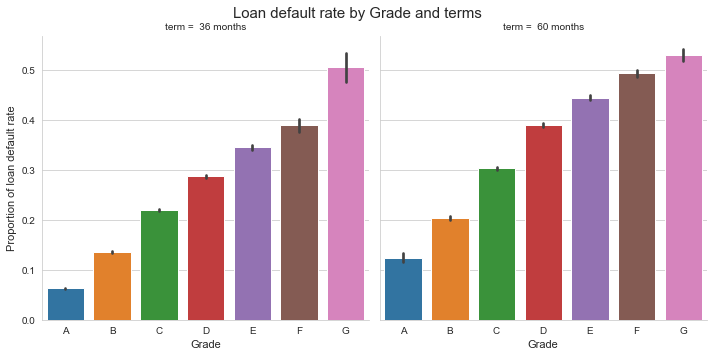

In [132]:
g = sns.catplot(x = 'grade', y= 'loan_status_count', data=loan_known_data, kind='bar', \
            order = sorted(loan_known_data['grade'].unique()), col='term')
plt.tight_layout()

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Loan default rate by Grade and terms', fontsize=15)
axes = g.axes.flatten()
axes[0].set_ylabel("Proportion of loan default rate", fontsize=11)
for ax in axes:
    ax.set_xlabel("Grade", fontsize=11)


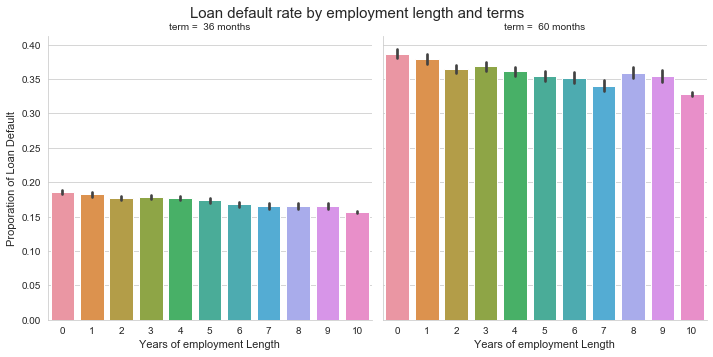

In [133]:
g = sns.catplot(x = 'emp_length', y= 'loan_status_count', data=loan_known_data, kind='bar', col='term')

plt.tight_layout()

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Loan default rate by employment length and terms', fontsize=15)
axes = g.axes.flatten()
axes[0].set_ylabel("Proporation of Loan Default", fontsize=11)
for ax in axes:
    ax.set_xlabel("Years of employment Length", fontsize=11)

In [140]:
s = loan_known_data.groupby('emp_length')['loan_status_count'].mean()
print(s)

emp_length
0     0.231822
1     0.226589
2     0.220636
3     0.222159
4     0.220999
5     0.217908
6     0.214706
7     0.211013
8     0.216277
9     0.216143
10    0.205794
Name: loan_status_count, dtype: float64


population 1 proportion for employment length less than 1 year is  0.237
population 2 proportion for employment length 10+ year is  0.195
combine proportion of both sample is  0.22
Standard error for our samples is  0.02
z score for selected sample is 2.28218
using normal distribution p-val for z score =  2.28 is 0.02248
Since our calcualted p-val = 0.02248 is less than significance level 0.05, we will reject the null hypothesis
[-0.00275162  0.00300857]


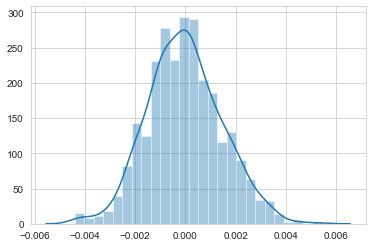

In [162]:
np.random.seed(47)
loan_status_0 = loan_known_data[loan_known_data['emp_length'] == 0]['loan_status_count'].to_numpy()

loan_status_10 = loan_known_data[loan_known_data['emp_length'] == 10]['loan_status_count'].to_numpy()

# Calcualting p1, p2 and p
sample_loan_status_0 = np.random.choice(loan_status_0, size=1000)
sample_loan_status_10 = np.random.choice(loan_status_10, size=1000)
p1 = np.mean(sample_loan_status_0)
p2 = np.mean(sample_loan_status_10)
n1 = len(sample_loan_status_0)
n2= len(sample_loan_status_10)
p = (p1*n1 + p2*n2)/(n1+n2)

se = np.sqrt(p*(1-p)* (1/n1 + 1/n2))
z = (p1-p2)/se

score = stats.norm.sf(abs(z))*2
print('population 1 proportion for employment length less than 1 year is ' ,p1)
print('population 2 proportion for employment length 10+ year is ', p2)
print('combine proportion of both sample is %5.2f' %p)
print('Standard error for our samples is %5.2f' %se)
print('z score for selected sample is %5.5f' %z)
print('using normal distribution p-val for z score = %5.2f is %5.5f' %(z, score))

print('Since our calcualted p-val = %5.5f is less than significance level 0.05, we will reject the null hypothesis' %score)

concated_data = np.concatenate((loan_status_0, loan_status_10))
loan_status_0_shifted = loan_status_0 - np.mean(loan_status_0) + np.mean(concated_data)
loan_status_10_shifted = loan_status_10 - np.mean(loan_status_10) + np.mean(concated_data)

def get_mean_samples(data, func, size):
    bs_reps = []
    for i in range(size):
        bs_reps.append(func(np.random.choice(data, size=1000)))
    return bs_reps

bs_replicates_a = draw_bs_reps(loan_status_0_shifted, np.mean, size=1000)
bs_replicates_b = draw_bs_reps(loan_status_10_shifted, np.mean, size=1000)

bs_replicates = bs_replicates_a - bs_replicates_b
bs_percentile = np.percentile(bs_replicates, [2.5, 97.5])
print(bs_percentile)
sns.distplot(bs_replicates)

